In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/finalRepoRate.csv')
df.head()

,Unnamed: 0,Date,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
0,0,2001-04-02,256.0,7.0,25.70,9.0,46.65
1,1,2001-04-03,257.1,7.0,26.65,9.0,46.67
2,2,2001-04-04,259.5,7.0,27.16,9.0,46.60
3,3,2001-04-05,258.1,7.0,27.24,9.0,46.64
4,4,2001-04-06,258.8,7.0,27.07,9.0,46.58


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Date,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
0,2001-04-02,256.0,7.0,25.70,9.0,46.65
1,2001-04-03,257.1,7.0,26.65,9.0,46.67
2,2001-04-04,259.5,7.0,27.16,9.0,46.60
3,2001-04-05,258.1,7.0,27.24,9.0,46.64
4,2001-04-06,258.8,7.0,27.07,9.0,46.58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5961 non-null   object 
 1   GoldPrice     5961 non-null   float64
 2   BankRate      5961 non-null   float64
 3   CrudeOilRate  5961 non-null   float64
 4   RepoRate      5961 non-null   float64
 5   UsdInr        5961 non-null   float64
dtypes: float64(5), object(1)
memory usage: 279.5+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5961 non-null   datetime64[ns]
 1   GoldPrice     5961 non-null   float64       
 2   BankRate      5961 non-null   float64       
 3   CrudeOilRate  5961 non-null   float64       
 4   RepoRate      5961 non-null   float64       
 5   UsdInr        5961 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 279.5 KB


In [ ]:
df.isnull().sum()

Date            0
GoldPrice       0
BankRate        0
CrudeOilRate    0
RepoRate        0
UsdInr          0
dtype: int64

In [ ]:
df.describe()

,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,1131.383577,6.482579,64.999433,6.571976,57.583287
std,522.733559,1.270984,25.205232,1.299553,12.952743
min,256.000000,4.250000,8.910000,4.000000,38.480000
25%,645.000000,6.000000,46.100000,6.000000,45.880000
50%,1229.300000,6.000000,63.140000,6.500000,54.220000
75%,1562.800000,6.750000,84.390000,7.750000,68.210000
max,2078.400000,10.250000,145.310000,9.000000,83.400000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import array
import math
def createPlot(df: any, x_col: array, y_cols: array, plot: any, **args):
  cols = 2
  rows = math.ceil(y_cols.size/cols)
  fig, ax = plt.subplots(rows, cols, figsize=(25,15))
  for i, col_name in enumerate(y_cols):
    if rows == 1:
      if x_col != '':
        plot(data=df, x=x_col, y=col_name, ax=ax[0,i%cols], **args)
      else:
        plot(data=df, y=col_name, ax=ax[0,i%cols], **args)
    else:
      if x_col != '':
        plot(data=df, x=x_col, y=col_name, ax=ax[i//cols, i%cols], **args)
      else:
        plot(data=df, y=col_name, ax=ax[i//cols, i%cols], **args)
  plt.show()

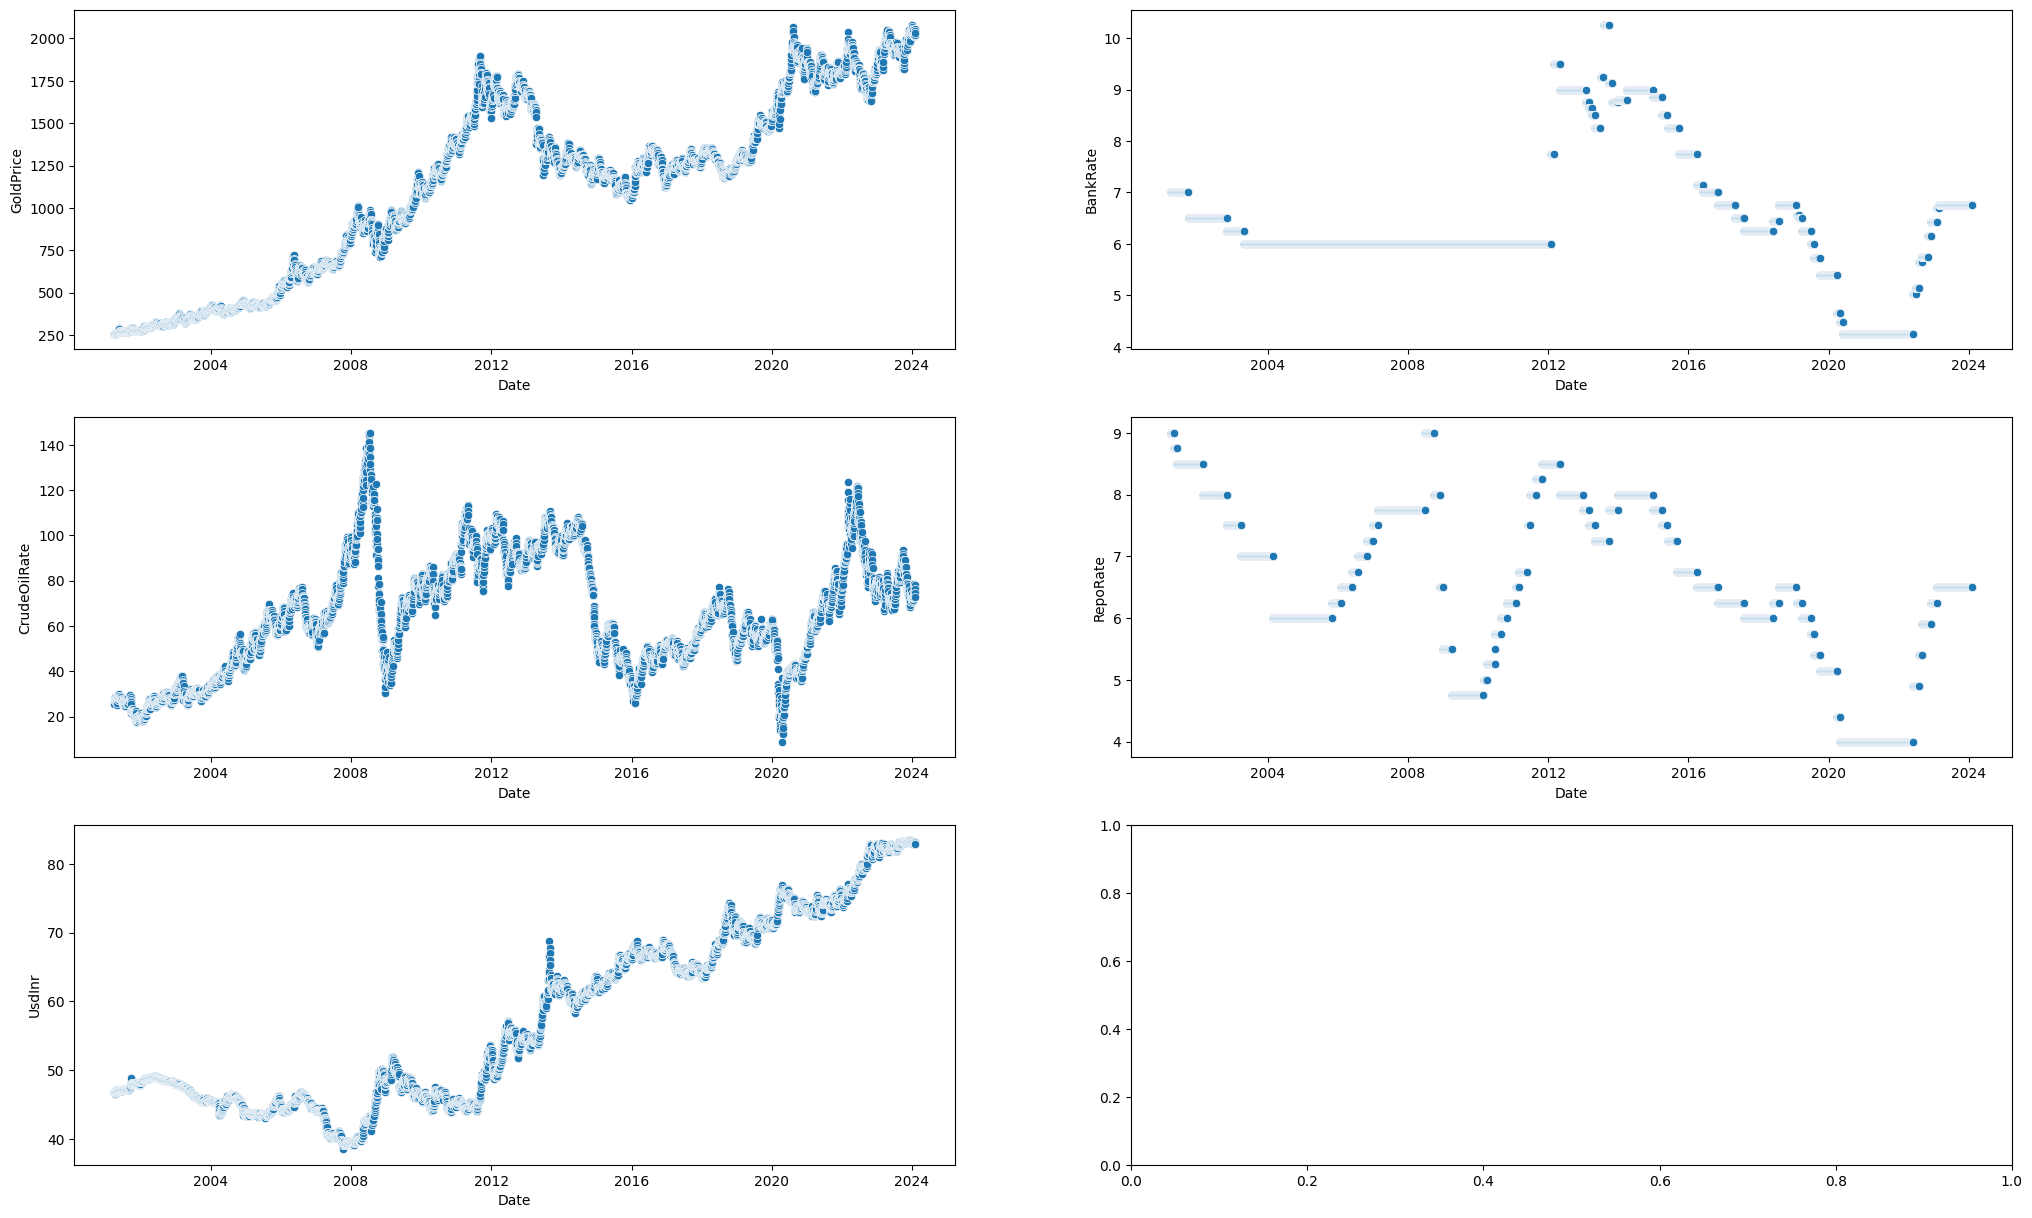

In [ ]:
createPlot(df, y_cols=df.columns.drop('Date'), x_col='Date', plot=sns.scatterplot)

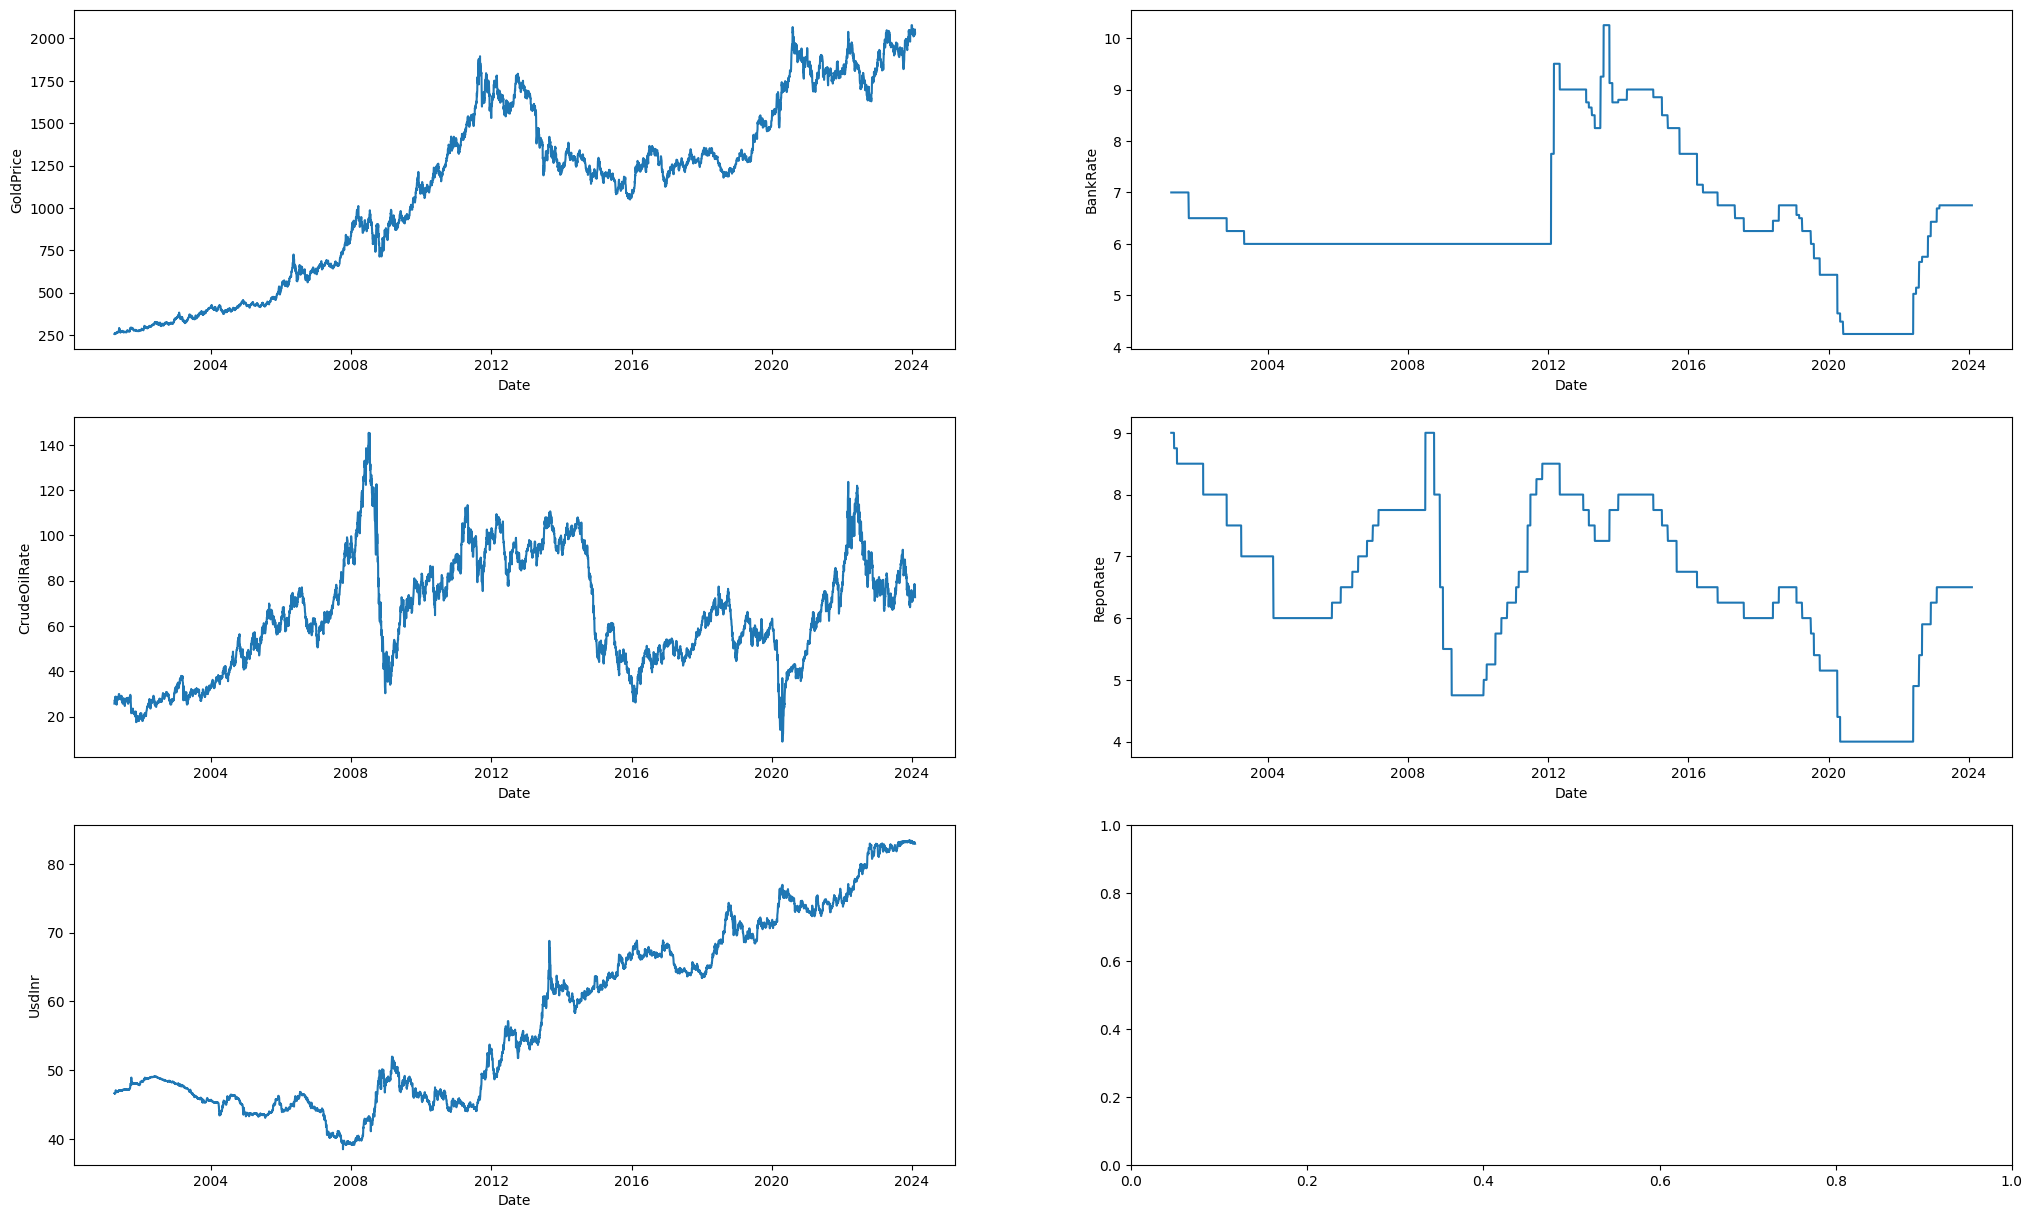

In [ ]:
createPlot(df, y_cols=df.columns.drop('Date'), x_col='Date', plot=sns.lineplot)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-le

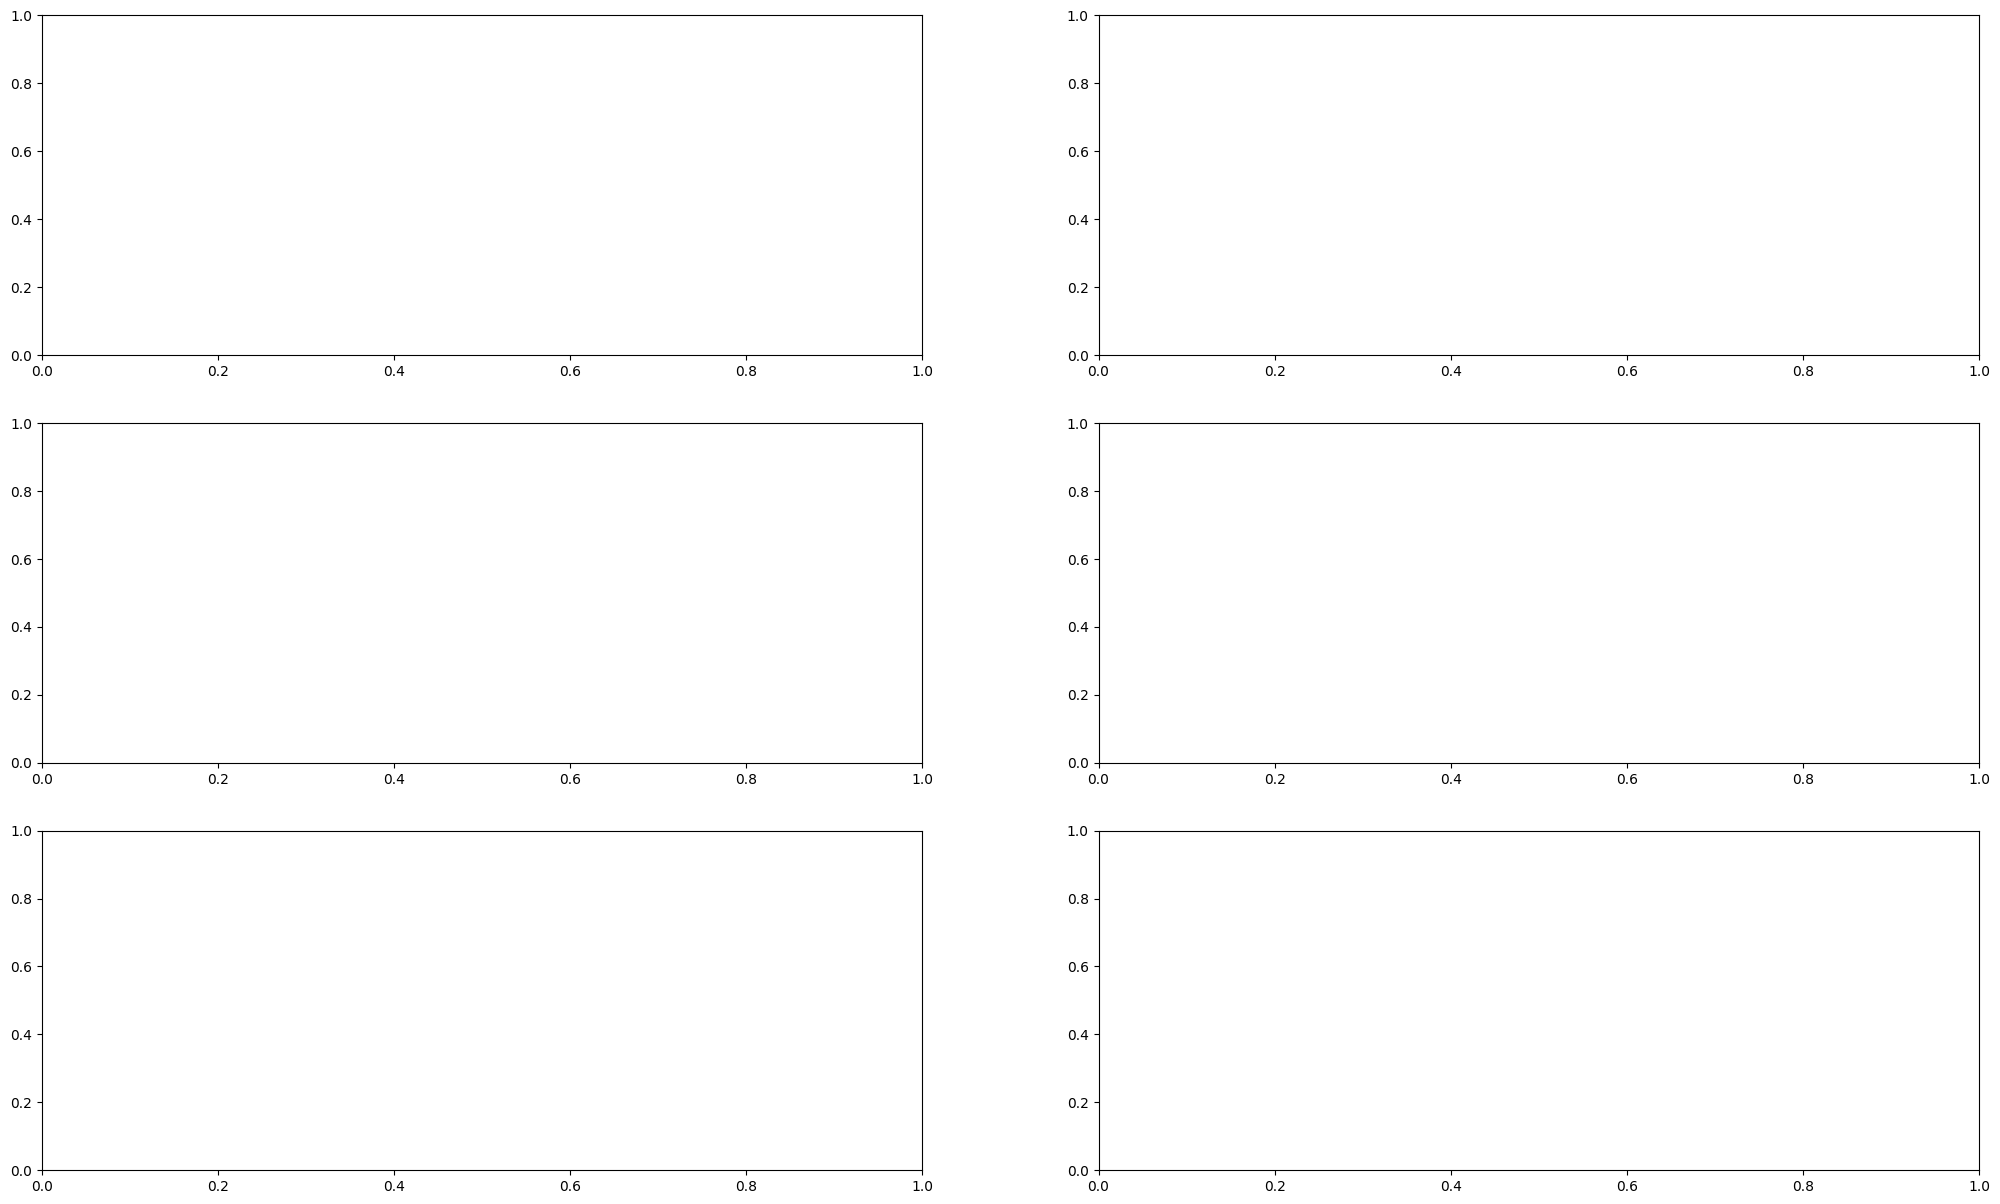

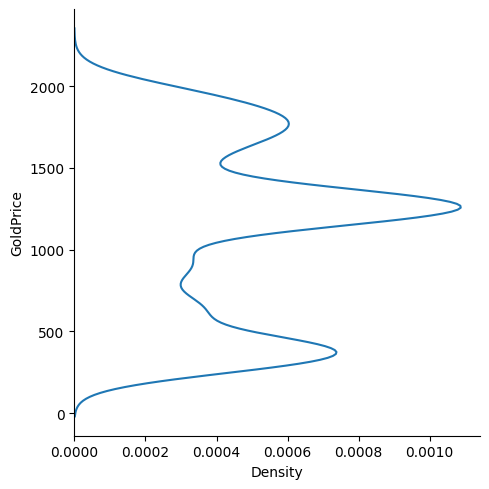

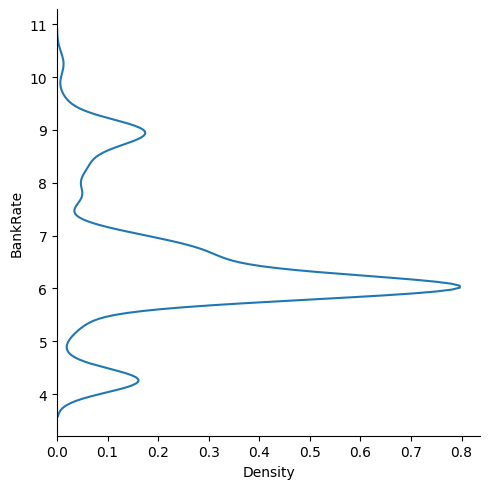

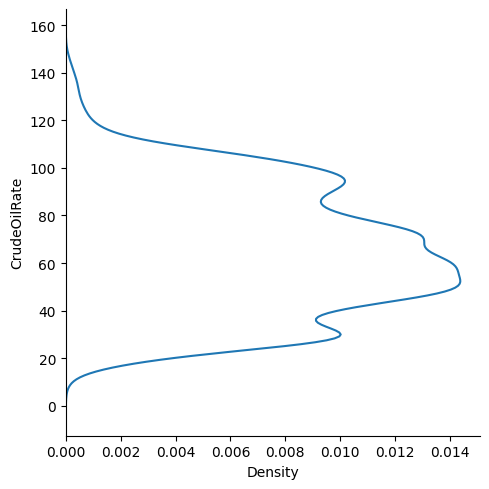

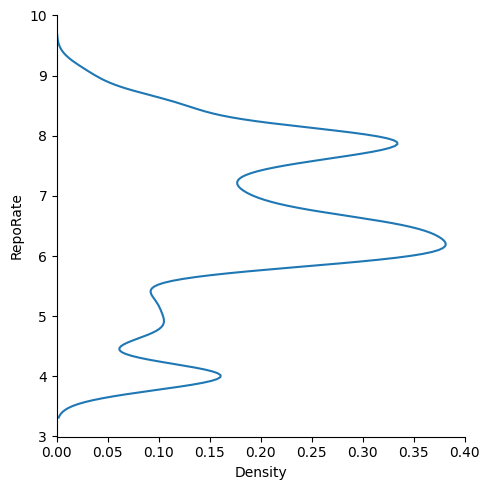

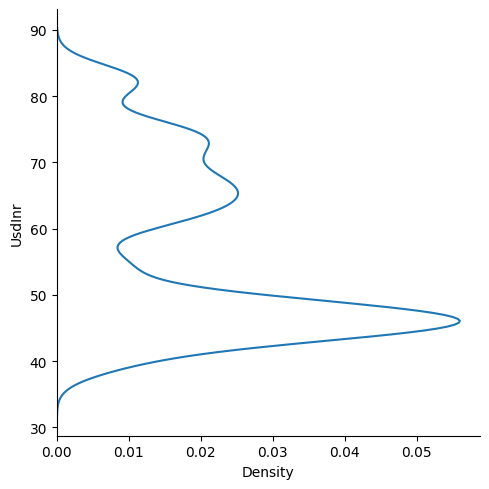

In [ ]:
createPlot(df, y_cols=df.columns.drop('Date'), x_col='', plot=sns.displot, kind="kde")

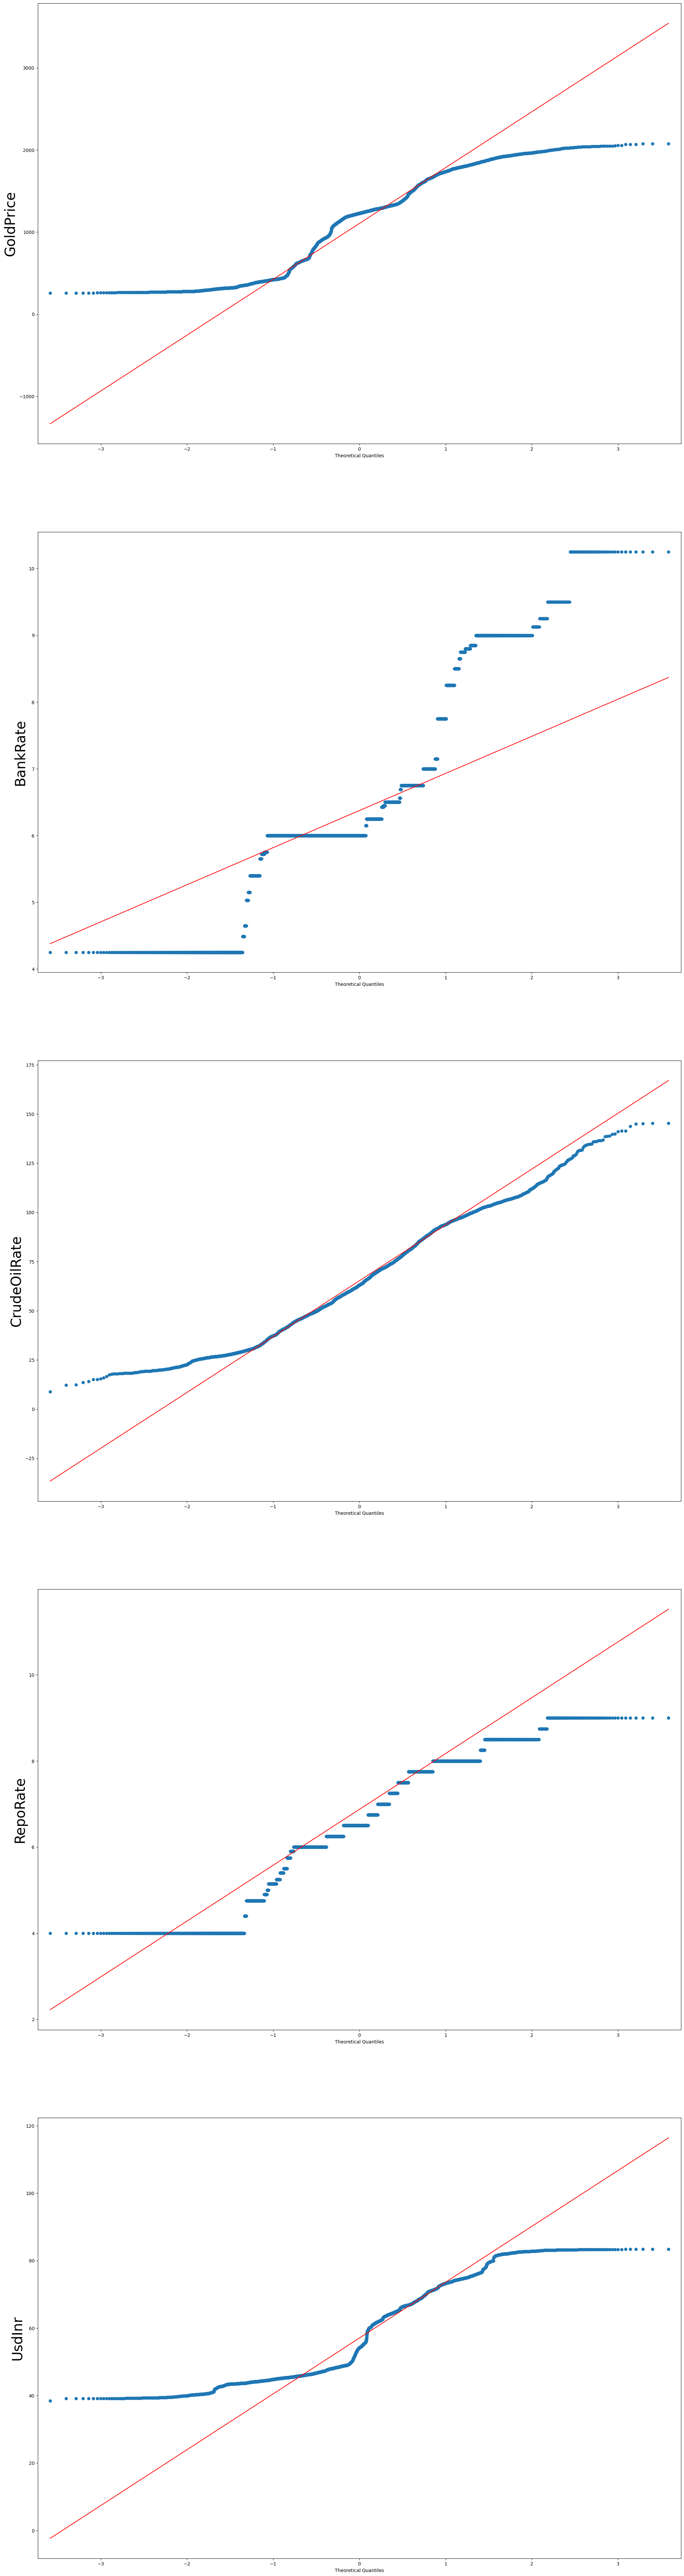

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
fig, ax = plt.subplots(5,1, figsize=(25,100))
for i, col_name in enumerate(df.columns.drop('Date')):
  sm.qqplot(df[col_name], line ='q',ax=ax[i])
  ax[i].set_ylabel(col_name,size = 30)
plt.show()

In [ ]:
from scipy.stats import boxcox

In [ ]:
def transforms(data):
  tr = 1/data
  ts = data**(1/2)
  tl = np.log1p(data)
  tb, l = boxcox(data)

  trs = tr**(1/2)
  trl = np.log1p(tr)
  trb, lrb = boxcox(tr)

  tsl = np.log1p(ts)
  tsb, lsb = boxcox(ts)

  tlb, llb = boxcox(tl)

  plots = {'original': data, 'reci': tr, 'sqrt': ts, 'log': tl, 'boxcox':tb, 'reci-sqrt': trs, 'reci-log': trl, 'reci-box': trb, 'sqrt-log':tsl, 'sqrt-box':tsb, 'log-box': tlb}
  fig, ax = plt.subplots(11, 2, figsize=(15,30))

  for i, name in enumerate(plots.keys()):
    sns.distplot(plots[name], ax=ax[i,0])
    ax[i,0].set_ylabel(name)
    sm.qqplot(plots[name], line='q', ax=ax[i, 1])
    ax[i,1].set_ylabel(name)
  plt.show()


<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

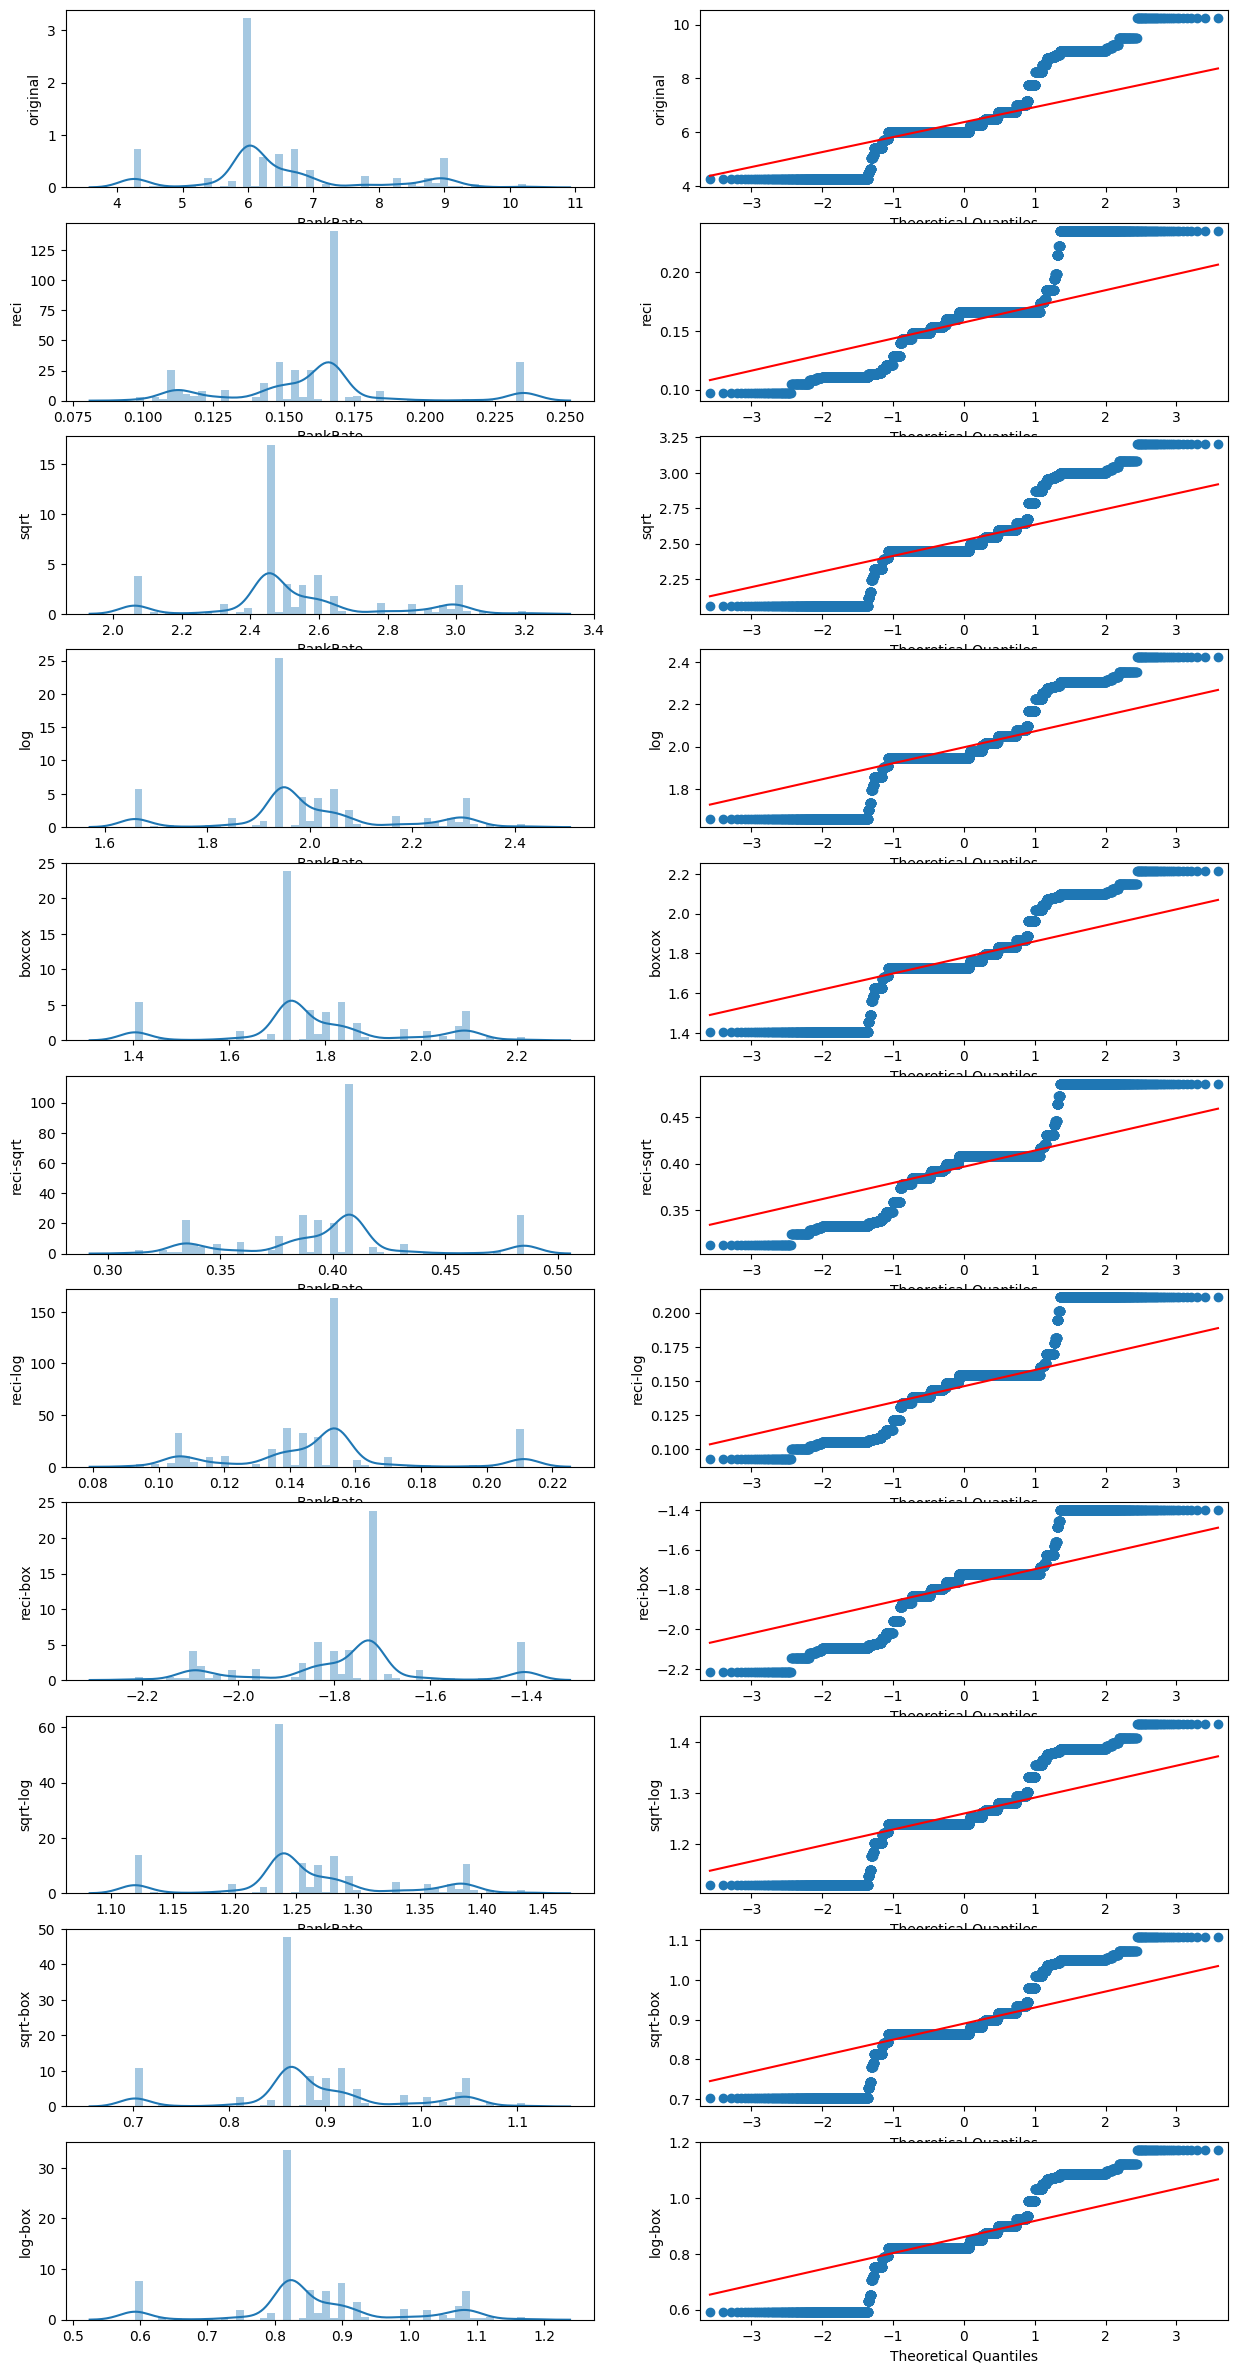

In [ ]:
transforms(df['BankRate'])

<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

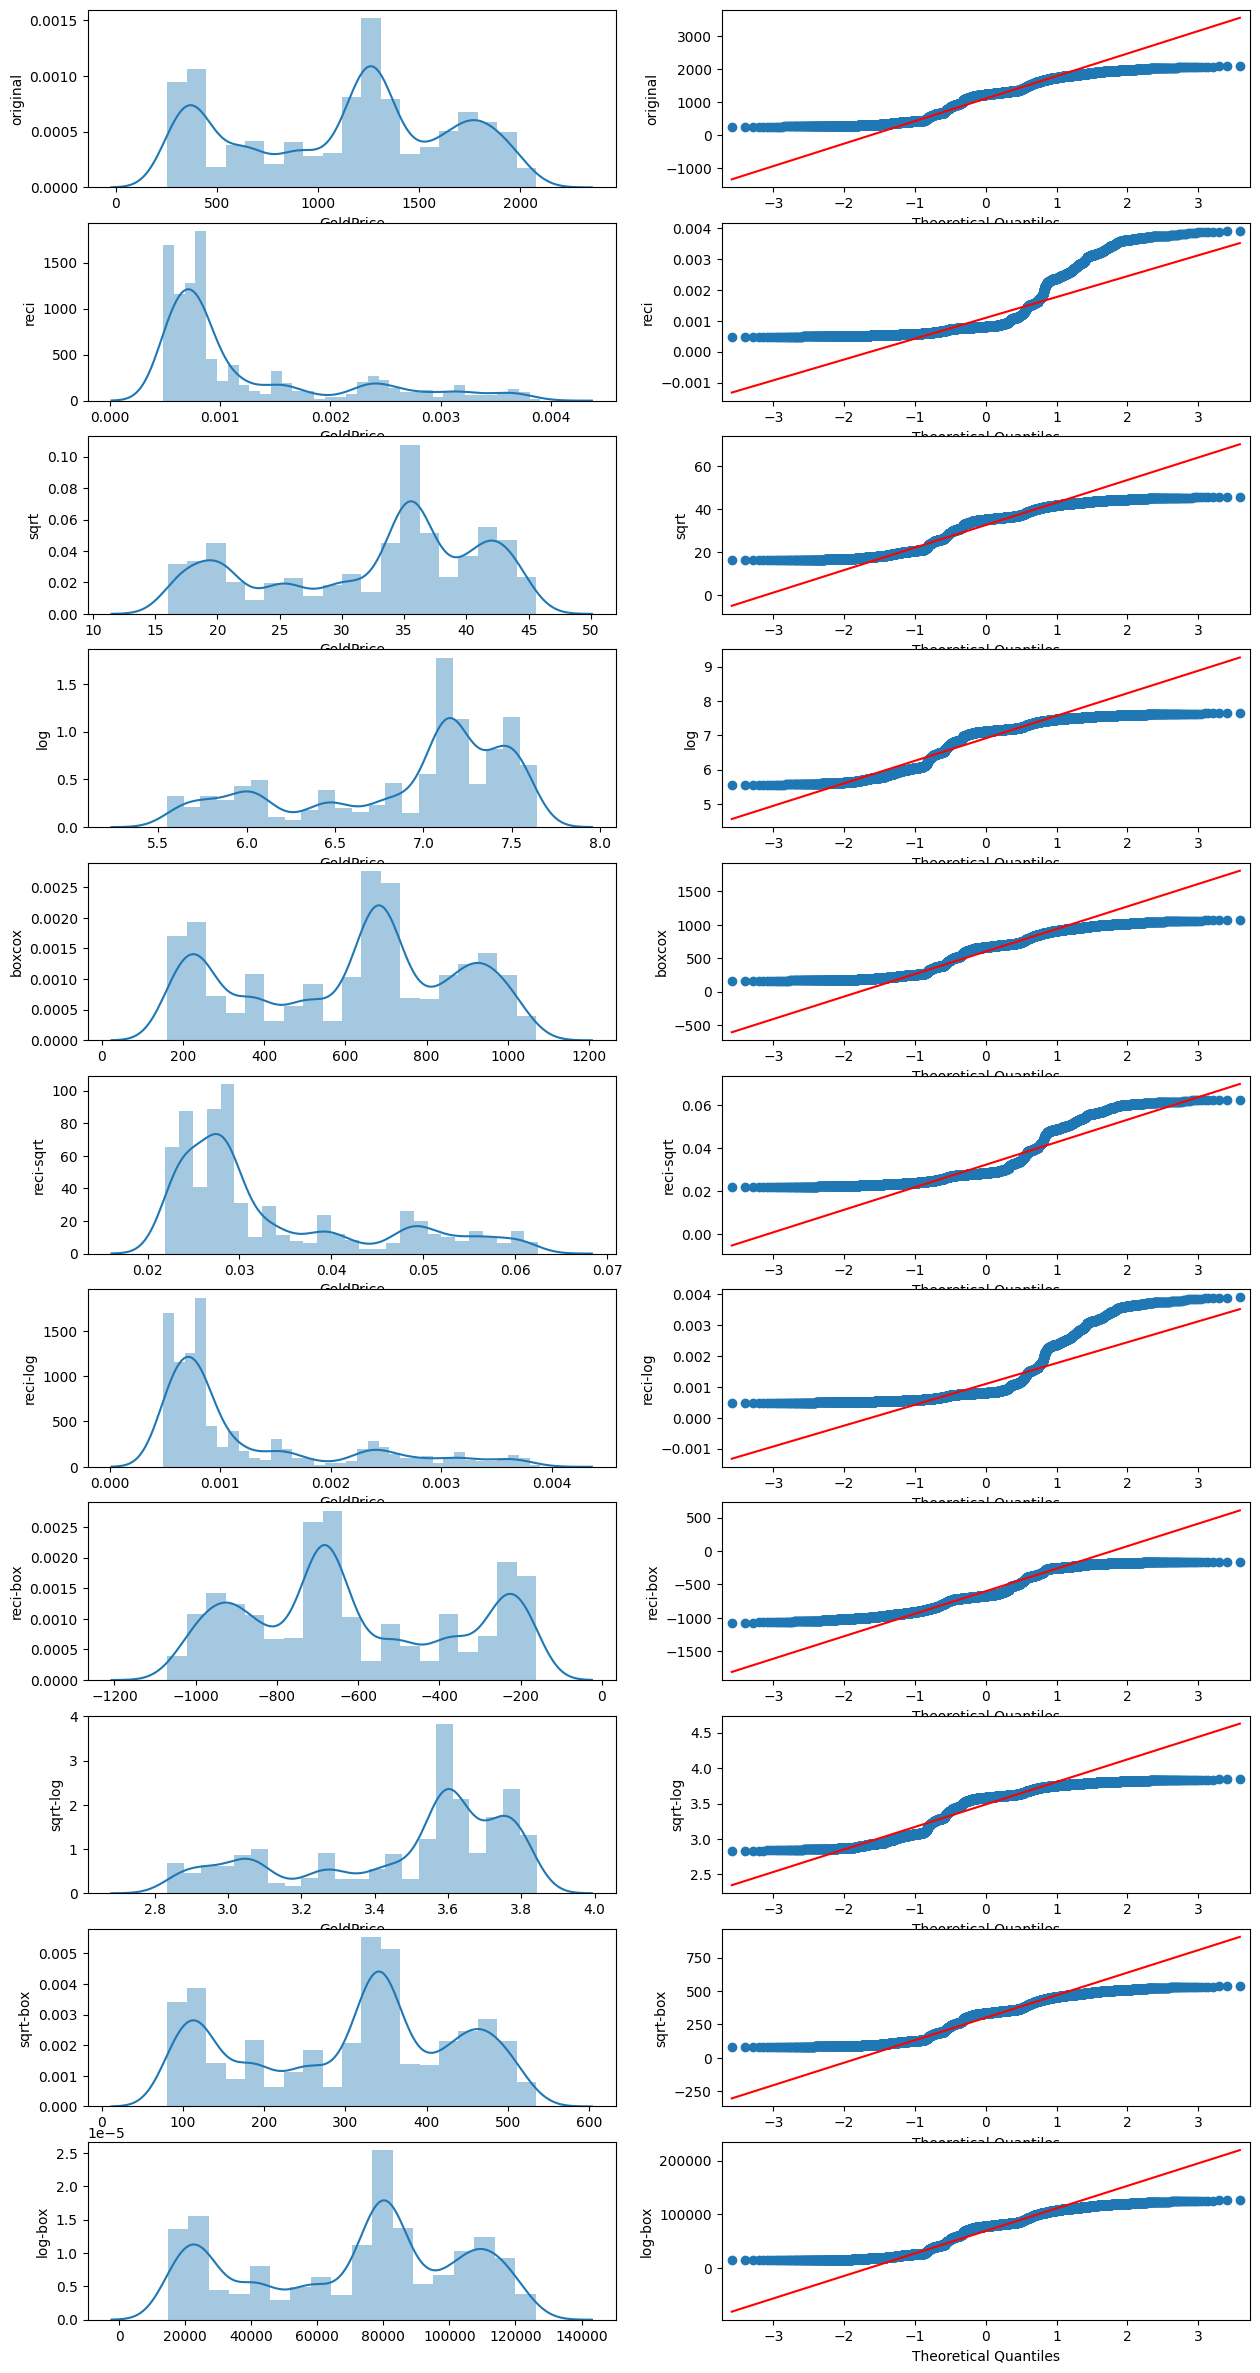

In [ ]:
transforms(df['GoldPrice'])

Log transformation little close to normal dist gor gold proce

<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

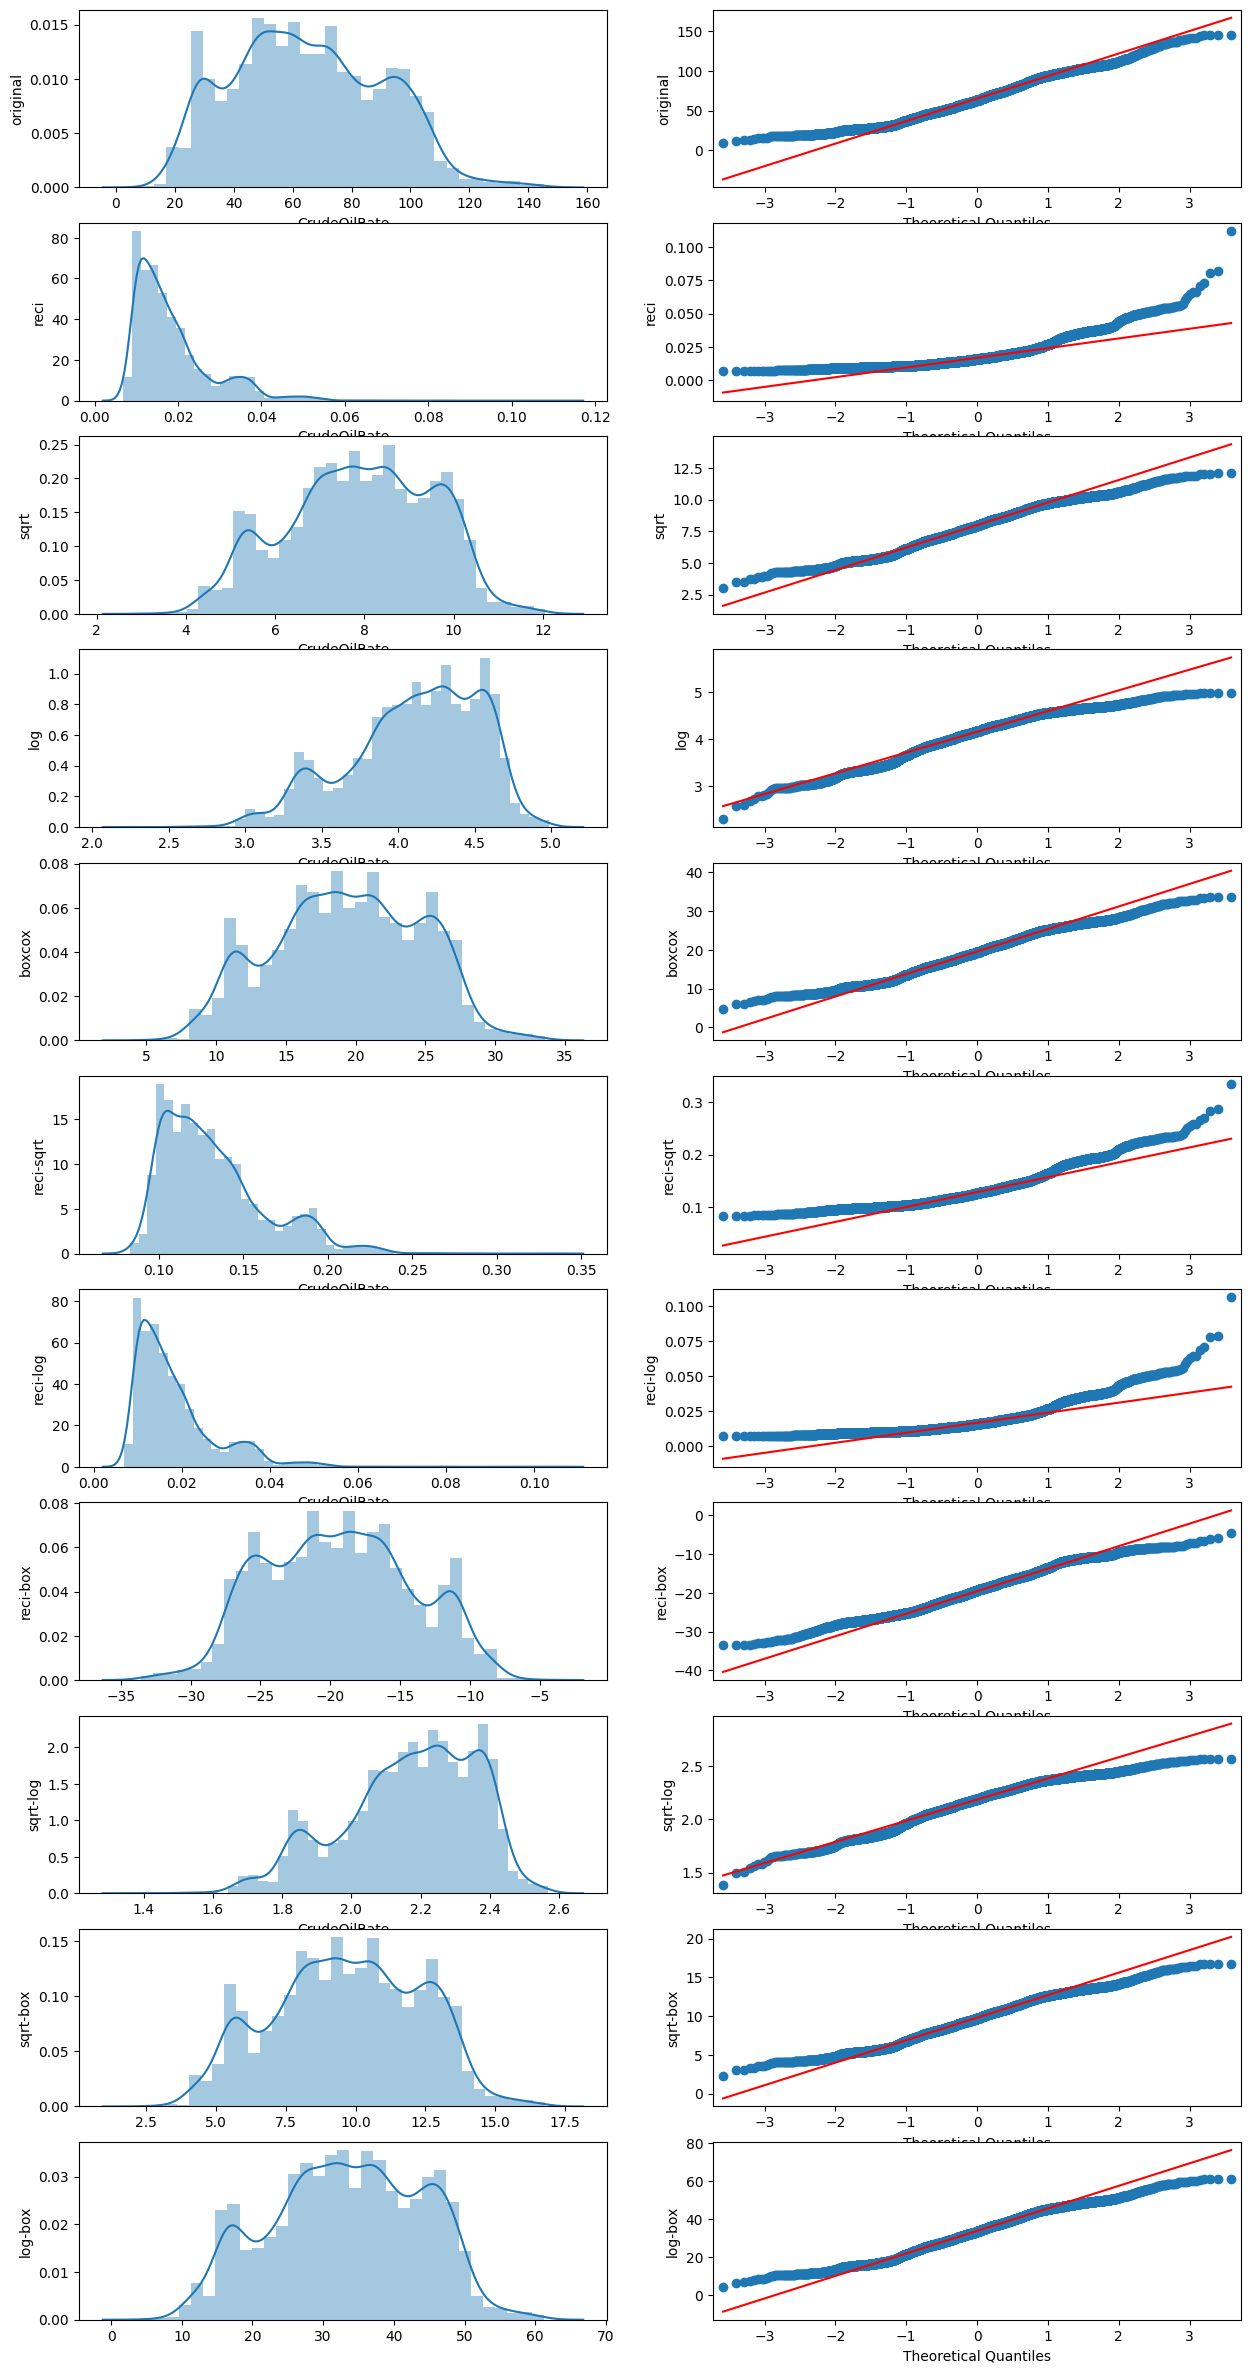

In [ ]:
transforms(df['CrudeOilRate'])

Log transformation is close to normal distribution

<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

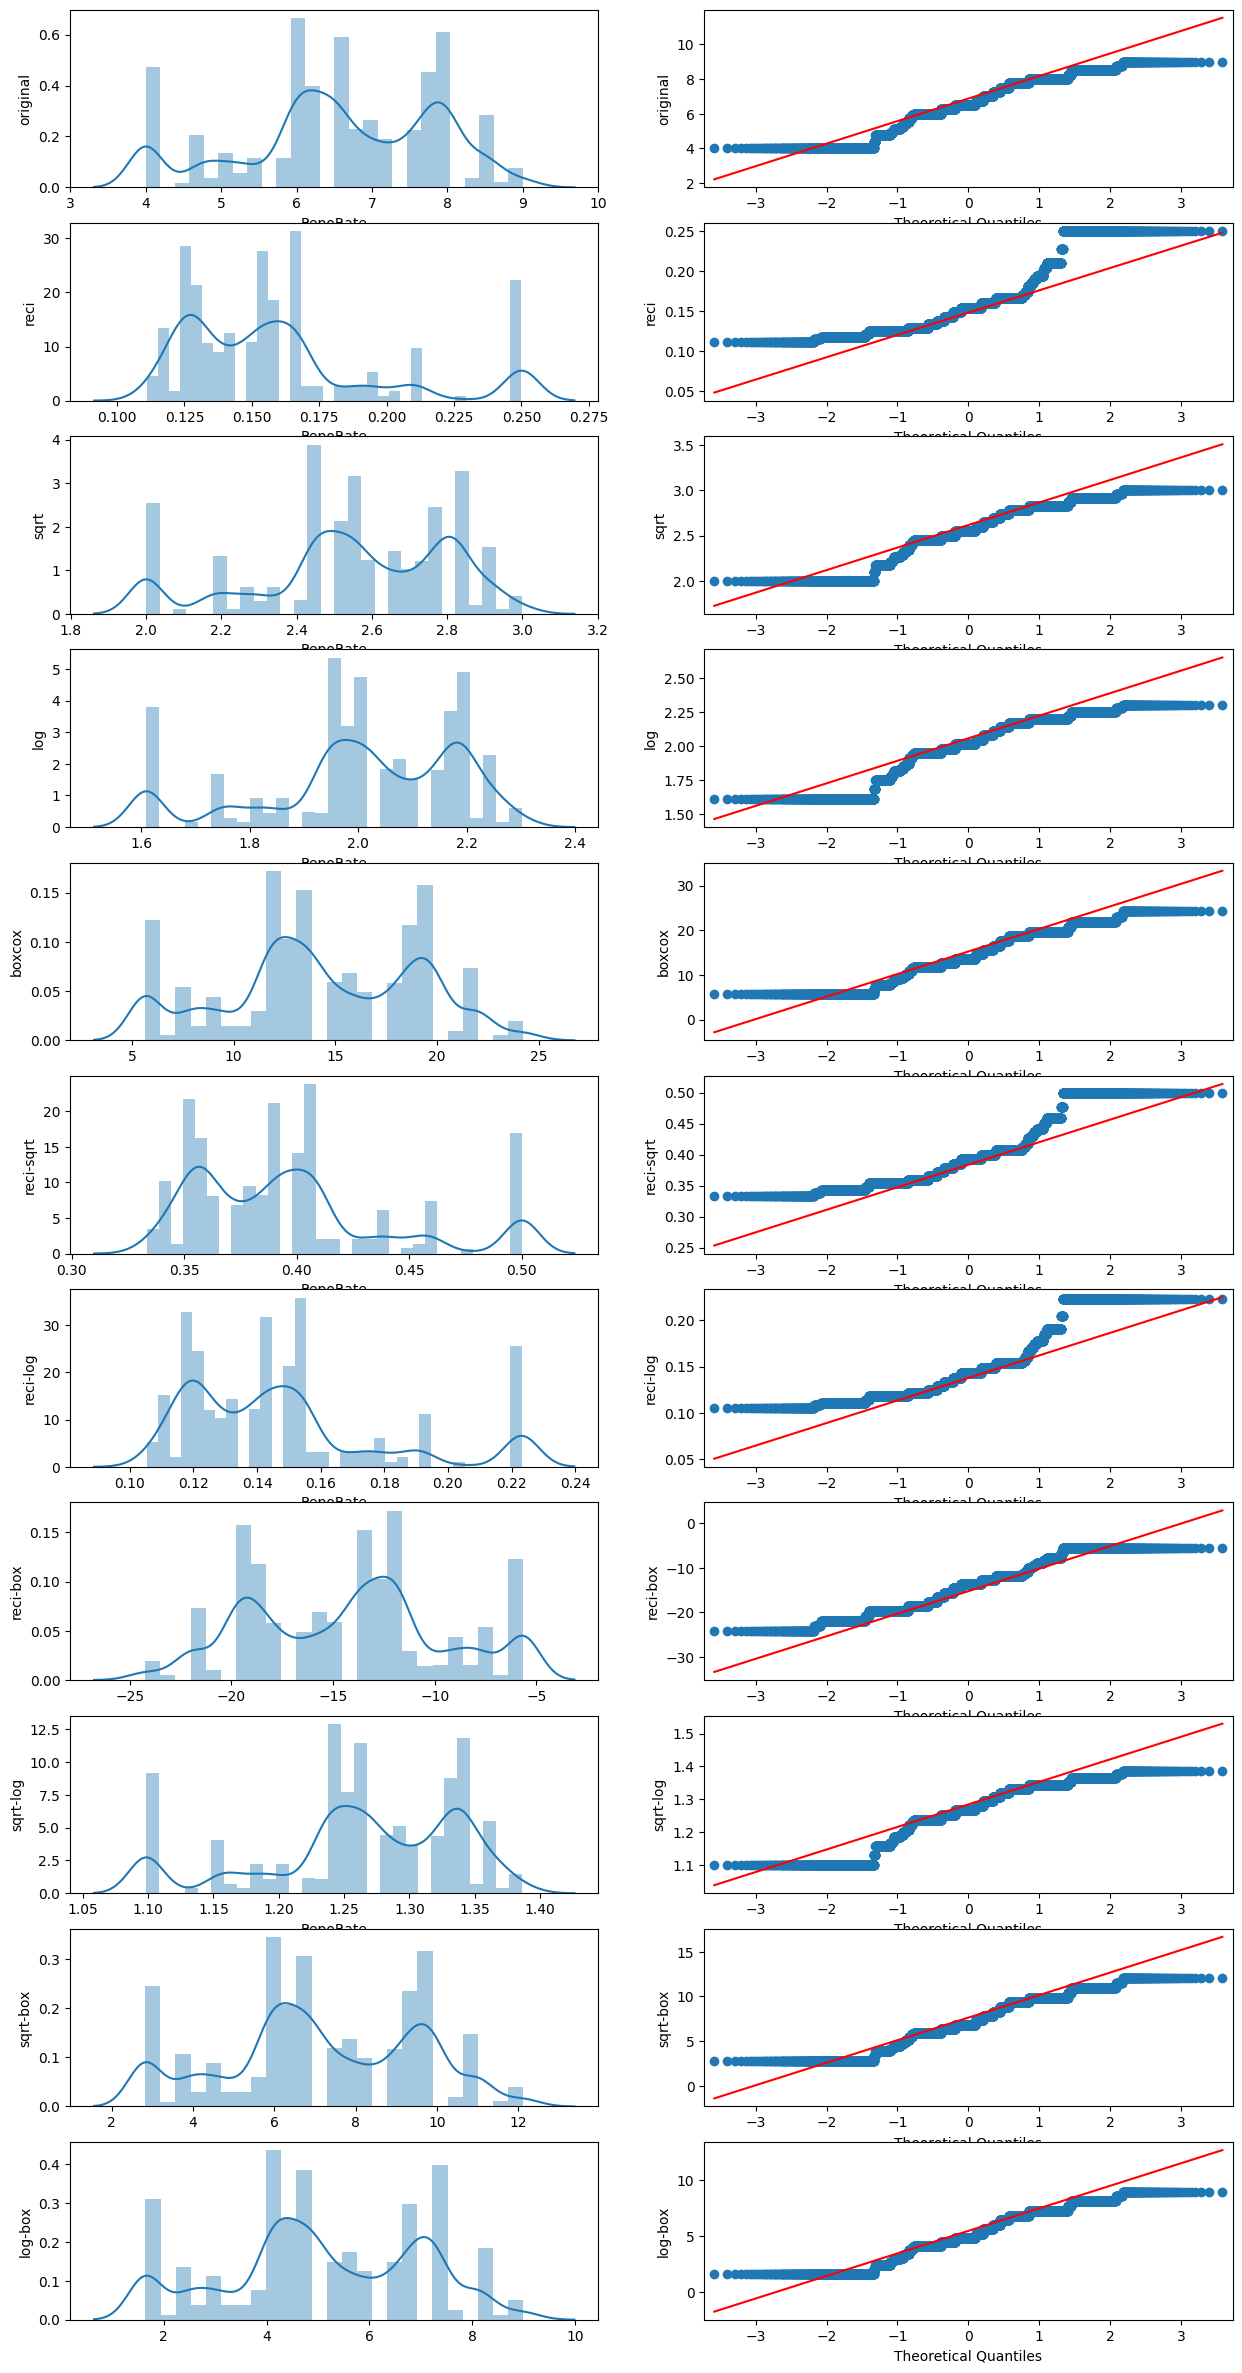

In [ ]:
transforms(df['RepoRate'])

BOXCOX transformation is little close to normal dist

<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-89-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

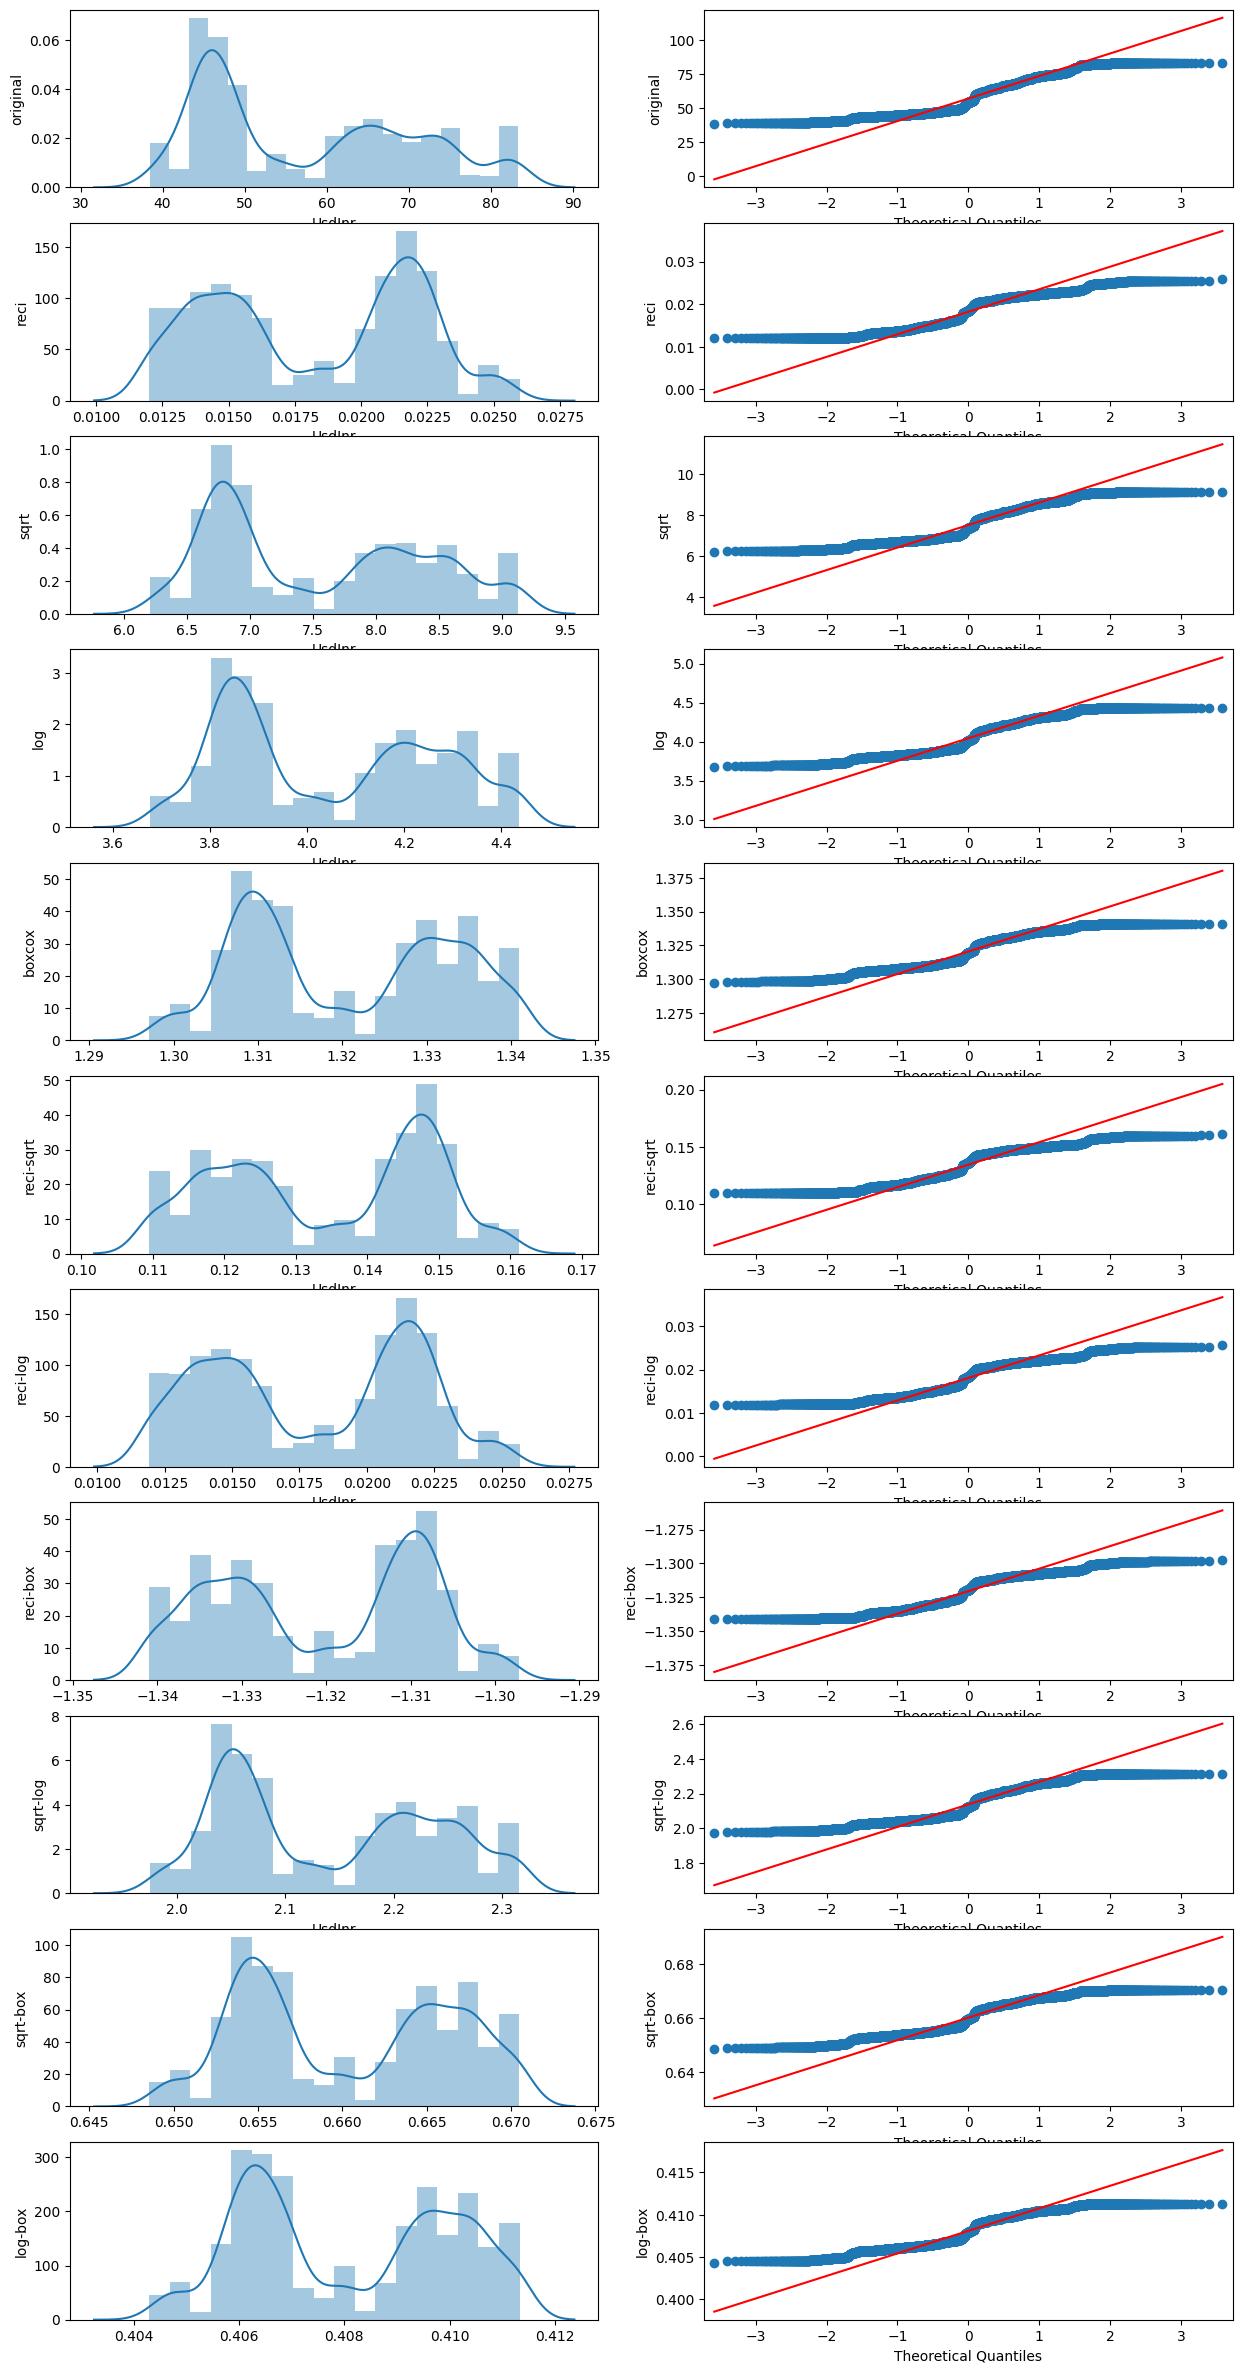

In [ ]:
transforms(df['UsdInr'])